In [1]:
#Start by importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from matplotlib import style

print("Imported")

Imported


# Data Selection and Preprocessing

In [2]:
df_house = pd.read_csv("Melbourne_housing_full.csv")
df_house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df_house.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [4]:
df_house.shape

(34857, 21)

In [5]:
df_house.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### Upon immediate inspection we can see that there are a few rows with missing (NAN) values. Will try and see how many nans exist and remove/update the data as appropriate.

In [6]:
#Will make a copy of the dataset first
df = df_house.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
#Can immediately see that some columns (e.g buildingarea) have a lot of missing values. 
#Will get the percentage of missing values.

percent = df.isnull().sum()/len(df)
percent

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionname       0.000086
Propertycount    0.000086
dtype: float64

As can be seen above a lot of columns have missing values. Some columns contain over 50% NAN values!!

There are a few options available here. The columns can be dropped, the rows can be dropped or some 
some of the data can be replaced using the mean,median or mode. 

- Any null values in price will be replaced with the mean.

- Any null values in distance,postcode, property count, latitude,longitude or region name will be dropped.

- Any null values in Bedroom, bedroom 2,year built, landsize or building area will be replaced with the mean.

In [9]:
df.duplicated().sum()
#Will drop the duplicate value

1

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
#Will drop the null values from a select few columns
df.dropna(subset = ["Distance","CouncilArea","Regionname","Propertycount","Lattitude","Longtitude"],inplace = True)
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5887
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2           267
Bathroom           276
Car                778
Landsize          3860
BuildingArea     13148
YearBuilt        11339
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64

In [12]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [13]:
df.shape

(26880, 21)

In [14]:
df_m = df.copy()

## Exploratory Data Analysis

Text(0, 0.5, 'Price (Australian Dollars)')

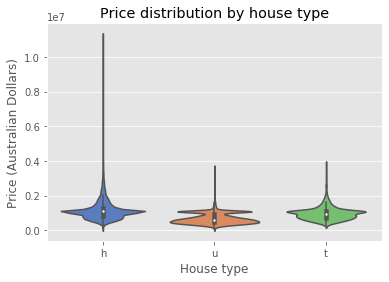

In [15]:
style.use("ggplot")

sns.violinplot(x ="Type",y="Price",data=df,palette="muted")
plt.title("Price distribution by house type")
plt.xlabel("House type")
plt.ylabel("Price (Australian Dollars)")

In [16]:
#As can be seen above there are large outliers for houses of type h. Will remove them so they don't affect
#the ML models. 

#remove Prices that are greater than 4,000,000 aus dollars
indexNames = df_m[(df_m["Price"] > 0.4e7)].index

In [17]:
df_m.drop(indexNames, inplace=True)

Text(0, 0.5, 'Price (Australian Dollars)')

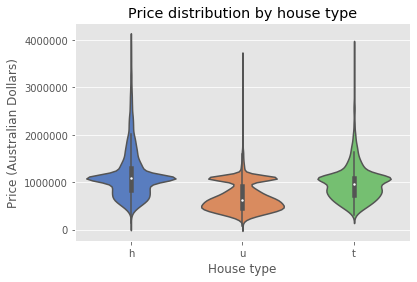

In [18]:
sns.violinplot(x ="Type",y="Price",data=df_m,palette="muted")
plt.title("Price distribution by house type")
plt.xlabel("House type")
plt.ylabel("Price (Australian Dollars)")

Will check some of the other columns and see their relationship to price

Text(0, 0.5, 'Price (Australian Dollars)')

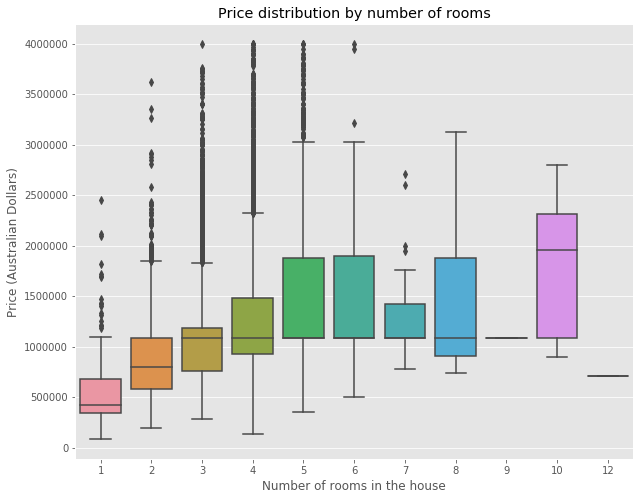

In [19]:
plt.figure(figsize=(10,8))

sns.boxplot(x ="Rooms",y="Price",data=df_m)
plt.title("Price distribution by number of rooms")
plt.xlabel("Number of rooms in the house")
plt.ylabel("Price (Australian Dollars)")

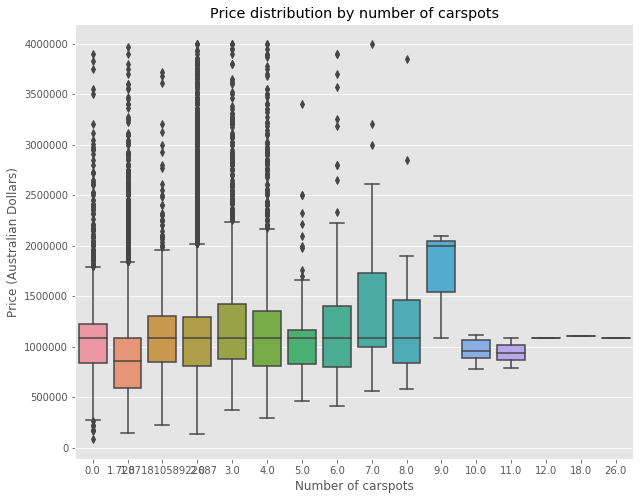

In [20]:
plt.figure(figsize=(10,8))

sns.boxplot(x ="Car",y="Price",data=df_m)
plt.title("Price distribution by number of carspots")
plt.xlabel("Number of carspots")
plt.ylabel("Price (Australian Dollars)")

plt.show()

There is a carspot with 1.7 spots which does not make sense as well as places with 12, 18 and 24 spots.
Will remove these as they do not serve much use for the analysis as 1.7 doesnt' make sense and the others have no distribution. Also, it appears that most of the data regardless of rooms is distributed under 2,500,000 dollars. Will remove any prices that are over this value. 

In [21]:
indexNames = df_m[(df_m["Car"] >=1.1) & (df_m["Car"] <=1.9)].index

In [22]:
df_m.drop(indexNames,inplace=True)

In [23]:
Indexnames1 = df_m[(df_m["Car"] >= 12)].index 

In [24]:
df_m.drop(Indexnames1,inplace=True)

In [25]:
Indexprice = df_m[(df_m["Price"] >= 2750000)].index 
df_m.drop(Indexprice,inplace=True)

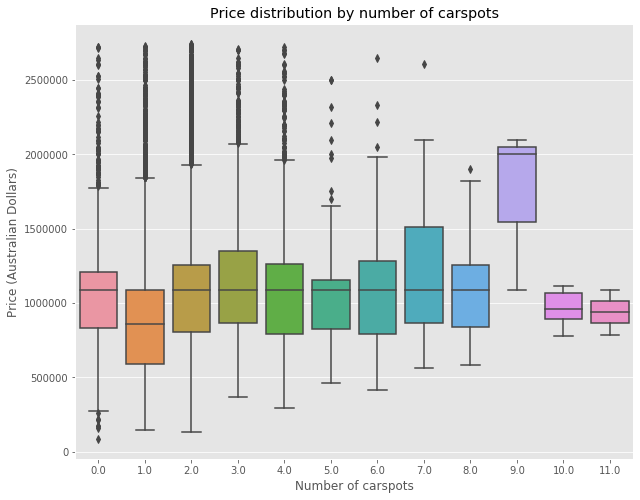

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(x ="Car",y="Price",data=df_m)
plt.title("Price distribution by number of carspots")
plt.xlabel("Number of carspots")
plt.ylabel("Price (Australian Dollars)")

plt.show()

Text(0.5, 0, 'Prices (Australian Dollars)')

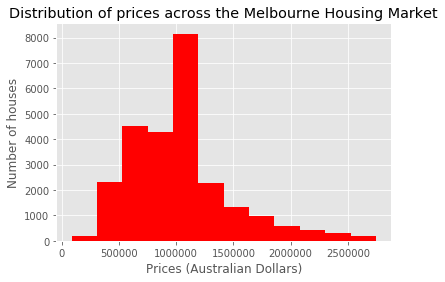

In [27]:
#Will look to see that our price variable is normally distributed
plt.hist(x="Price",data=df_m,bins = 12,density = None,color='red')
plt.title("Distribution of prices across the Melbourne Housing Market")
plt.ylabel("Number of houses")
plt.xlabel("Prices (Australian Dollars)")

## Data Preprocessing
Now that our data has been cleaned and any duplicate or null values removed, we will move onto the pre-processing stage.

In [29]:
df_m.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.089746e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,160.27523,1965.278489,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,160.27523,1965.278489,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.089746e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,160.27523,1965.278489,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [30]:
print(df_m["Suburb"].unique()) #huge number of names.
print(df_m["SellerG"].unique()) #huge number of names. Will drop this column a
                              #as it does not hold much use for us

['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' 'North Melbourne' 'Northcote'

In [31]:
print(len(df_m["Suburb"].unique()))
print(len(df_m["SellerG"].unique()))

344
355


In [32]:
print(df_m["Type"].unique()) #Will one hot enconde this
print(df_m["Method"].unique()) #Tells us how property was sold
print(df_m["CouncilArea"].unique()) #33 different names

['h' 'u' 't']
['SS' 'S' 'VB' 'SP' 'PI' 'SN' 'W' 'PN' 'SA']
['Yarra City Council' 'Moonee Valley City Council'
 'Port Phillip City Council' 'Darebin City Council'
 'Hobsons Bay City Council' 'Stonnington City Council'
 'Boroondara City Council' 'Monash City Council' 'Glen Eira City Council'
 'Whitehorse City Council' 'Maribyrnong City Council'
 'Bayside City Council' 'Moreland City Council' 'Manningham City Council'
 'Melbourne City Council' 'Banyule City Council' 'Brimbank City Council'
 'Kingston City Council' 'Hume City Council' 'Knox City Council'
 'Maroondah City Council' 'Casey City Council' 'Melton City Council'
 'Greater Dandenong City Council' 'Nillumbik Shire Council'
 'Cardinia Shire Council' 'Whittlesea City Council'
 'Frankston City Council' 'Macedon Ranges Shire Council'
 'Yarra Ranges Shire Council' 'Wyndham City Council'
 'Moorabool Shire Council' 'Mitchell Shire Council']


In [33]:
print(df_m["Regionname"].unique()) #Will create dummy variables for this variable. 

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']


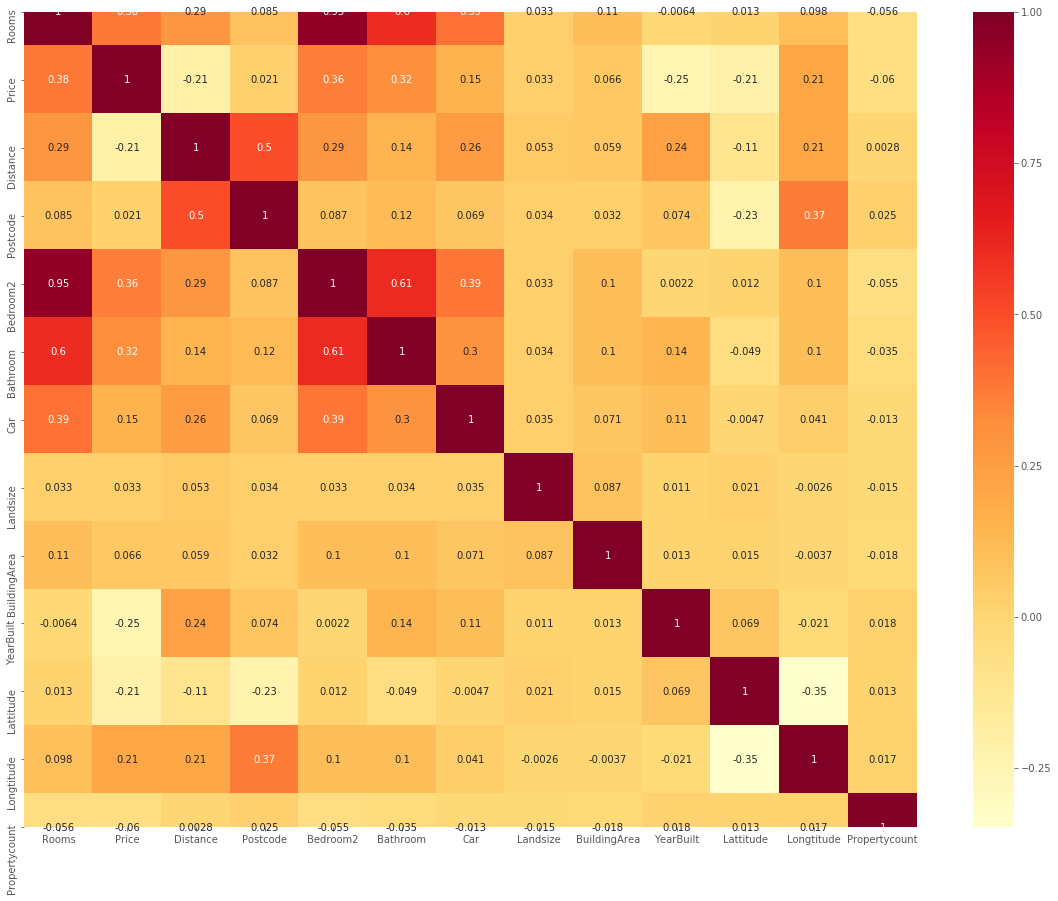

In [34]:
#Will get a correlation matrix before one hot encoding to check for multicollinearity
plt.style.use("ggplot")
plt.figure(figsize= (20,15))
corrMatrix = df_m.corr()
sns.heatmap(corrMatrix, annot = True,cmap = "YlOrRd")
plt.show()

In [35]:
#Want to convert some of the qualitative variables into quantitative variables.
df_m = pd.get_dummies(df_m, columns = ["Type","Method","Regionname"])
df_m.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,68 Studley St,2,1.089746e+06,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,Abbotsford,85 Turner St,2,1.480000e+06,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,1.035000e+06,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3,Abbotsford,18/659 Victoria St,3,1.089746e+06,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,...,1,0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,3,1.465000e+06,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
#Will now drop some of the variables that I will not be using
#These are suburb, adddress and SellerG,date and Council Area
df_m.drop(columns = ["Suburb","Address","SellerG","Date","CouncilArea"],inplace = True)

In [37]:
df_m.shape

(25554, 33)

In [38]:
df_m.dtypes #Checking to ensure the data is suitable before ML

Rooms                                      int64
Price                                    float64
Distance                                 float64
Postcode                                 float64
Bedroom2                                 float64
Bathroom                                 float64
Car                                      float64
Landsize                                 float64
BuildingArea                             float64
YearBuilt                                float64
Lattitude                                float64
Longtitude                               float64
Propertycount                            float64
Type_h                                     uint8
Type_t                                     uint8
Type_u                                     uint8
Method_PI                                  uint8
Method_PN                                  uint8
Method_S                                   uint8
Method_SA                                  uint8
Method_SN           

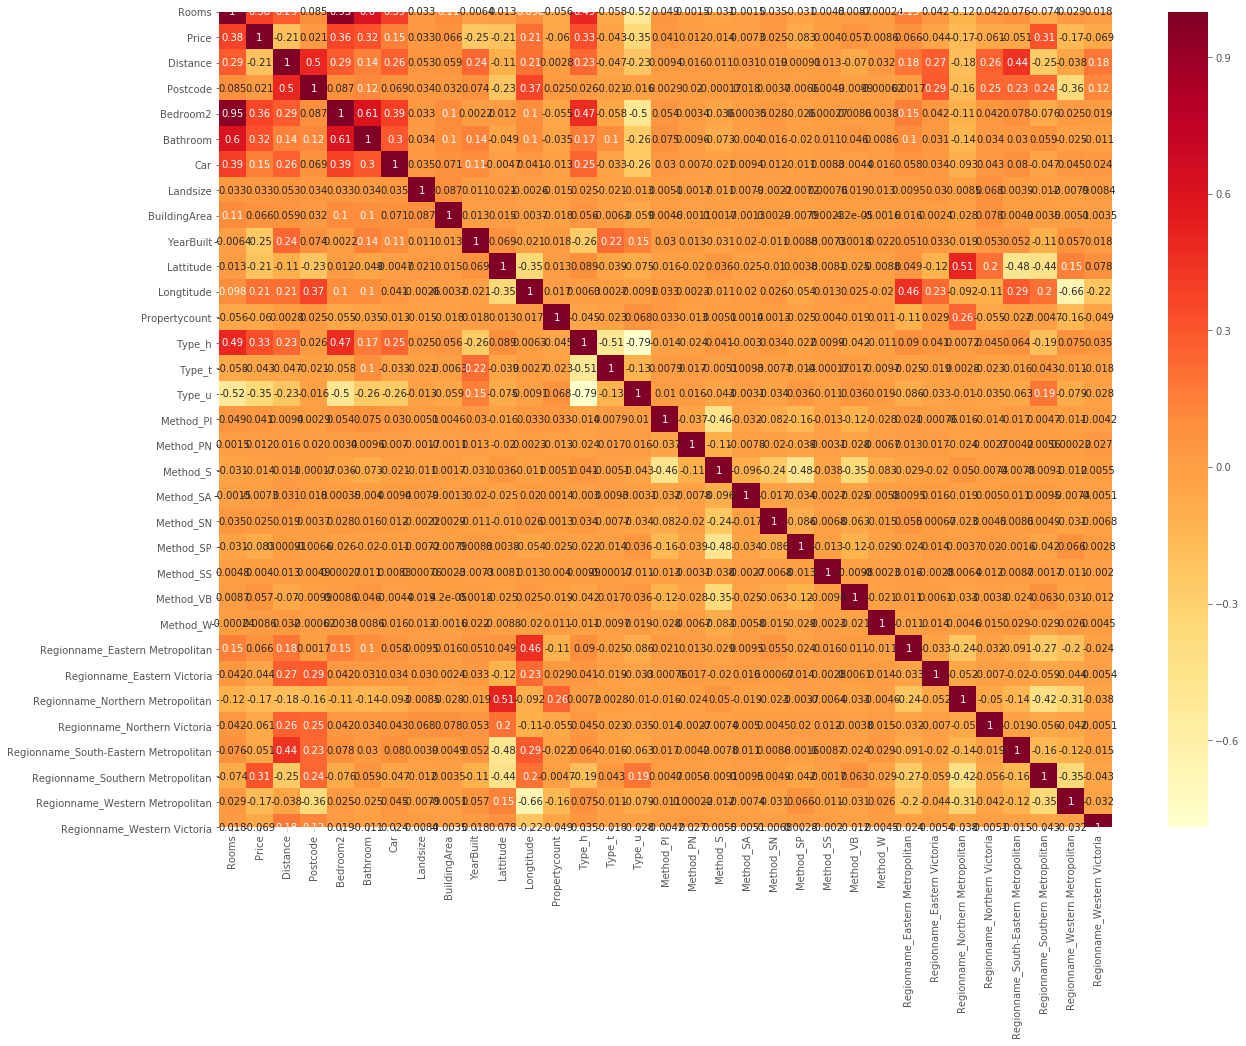

In [39]:
#bigger correlation matrix 
plt.style.use("ggplot")
plt.figure(figsize= (20,15))
corrMatrix = df_m.corr()
sns.heatmap(corrMatrix, annot = True,cmap = "YlOrRd")
plt.show()

In [40]:
corrMatrix["Price"].sort_values(ascending= False)

Price                                    1.000000
Rooms                                    0.382336
Bedroom2                                 0.364138
Type_h                                   0.329396
Bathroom                                 0.316758
Regionname_Southern Metropolitan         0.308776
Longtitude                               0.206794
Car                                      0.148666
Regionname_Eastern Metropolitan          0.065650
BuildingArea                             0.065575
Method_VB                                0.056674
Method_PI                                0.040840
Landsize                                 0.033234
Method_SN                                0.025472
Postcode                                 0.021381
Method_PN                                0.011564
Method_W                                 0.008632
Method_SS                                0.003972
Method_SA                               -0.007291
Method_S                                -0.013643


Rooms, bedroom2 and bathroom were highly correlated with each other so only total rooms was used despite bedrrom2 and bathroom being highly correlated.  

In [41]:
df_m.drop(columns = ["Bedroom2","Bathroom"],inplace=True)

In [70]:
# Import the relevant libraries before carrying out ML
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [71]:
X = df_m.loc[:,df_m.columns != "Price"] #Will try with all columns
X = X.to_numpy()
X[0:5]

array([[ 2.00000000e+00,  2.50000000e+00,  3.06700000e+03,
         1.00000000e+00,  1.26000000e+02,  1.60275230e+02,
         1.96527849e+03, -3.78014000e+01,  1.44995800e+02,
         4.01900000e+03,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+00,  2.50000000e+00,  3.06700000e+03,
         1.00000000e+00,  2.02000000e+02,  1.60275230e+02,
         1.96527849e+03, -3.77996000e+01,  1.44998400e+02,
         4.01900000e+03,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [72]:
Y = df_m.loc[:,"Price"]
Y = Y.to_numpy() #convert the dataframe to numpy to make it suitable for sklearn's libraries
Y[0:5]

array([1089746.17505835, 1480000.        , 1035000.        ,
       1089746.17505835, 1465000.        ])

In [73]:
# Also need to normalize the data. Use the Standard Scaler function from the sklearn library.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.14344056e+00, -1.29480710e+00, -4.35065655e-01,
        -7.24545020e-01, -1.45019537e-01,  4.49088153e-03,
        -2.45263129e-02,  9.18930633e-02, -4.97026605e-02,
        -8.01634355e-01,  5.64485512e-01, -2.85665909e-01,
        -4.46457350e-01, -3.91222160e-01, -9.46718913e-02,
        -1.16740285e+00, -8.20779650e-02, -2.08539956e-01,
        -4.10361434e-01,  3.07480803e+01, -3.01009072e-01,
        -7.06731256e-02, -3.87556831e-01, -8.53953435e-02,
         1.63158844e+00, -8.20779650e-02, -2.33944575e-01,
        -6.86779087e-01, -5.09533502e-01, -6.26789886e-02],
       [-1.14344056e+00, -1.29480710e+00, -4.35065655e-01,
        -7.24545020e-01, -1.21089250e-01,  4.49088153e-03,
        -2.45263129e-02,  1.11567098e-01, -2.82922680e-02,
        -8.01634355e-01,  5.64485512e-01, -2.85665909e-01,
        -4.46457350e-01, -3.91222160e-01, -9.46718913e-02,
         8.56602332e-01, -8.20779650e-02, -2.08539956e-01,
        -4.10361434e-01, -3.25223555e-02, -3.01009072e-

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, random_state = None)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20443, 30) (20443,)
Test set: (5111, 30) (5111,)


## Linear Regression

In [75]:
lm = LinearRegression() #Create an object of the linear regression class
lm.fit(X_train,y_train) #Fit this object to the training data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print ('Coefficients: ', lm.coef_) #Get the linear regression coefficients.

Coefficients:  [ 1.32114739e+05 -1.89674789e+05  1.91172928e+04  2.36089352e+04
  1.44418313e+04  1.09596986e+04 -2.81004073e+04 -7.03778362e+04
  5.31101376e+04 -3.37051769e+03 -4.59603170e+17 -2.83561632e+17
 -3.99669619e+17  2.66568066e+16  7.37191855e+15  3.88170919e+16
  6.40538524e+15  1.57013160e+16  2.75937614e+16  2.55245148e+15
  2.16843363e+16  5.52490922e+15 -1.01395213e+16 -2.55113934e+15
 -1.34072043e+16 -2.45338763e+15 -6.67462985e+15 -1.40431159e+16
 -1.21727083e+16 -1.87877452e+15]


In [77]:
#Prediction for the linear regression model
yhat = lm.predict(X_test) #Create predictions.
yhat

array([1472421.13732079, 1557077.13732079,  906549.13732079, ...,
       1174421.13732079, 1553125.13732079,  939557.13732079])

In [78]:
from sklearn.metrics import r2_score

In [79]:
print("R-squared: ",r2_score(y_test,yhat)) 
print("MAE:", metrics.mean_absolute_error(y_test, yhat))
print('MSE:', metrics.mean_squared_error(y_test, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

R-squared:  0.4590511064855951
MAE: 243146.9172662474
MSE: 102668262568.28549
RMSE: 320418.8860980037


In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
from matplotlib import rcParams
#Will use these libraries to obtain the p-values, f-statistic and determine if our model is valid

In [81]:
model = sm.OLS(Y, X1) #Dependent variable is price
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     835.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:13:55   Log-Likelihood:            -3.6017e+05
No. Observations:               25554   AIC:                         7.204e+05
Df Residuals:                   25526   BIC:                         7.206e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.351e+05   2711.498     49.825      0.0

In [58]:
#!pip install yellowbrick

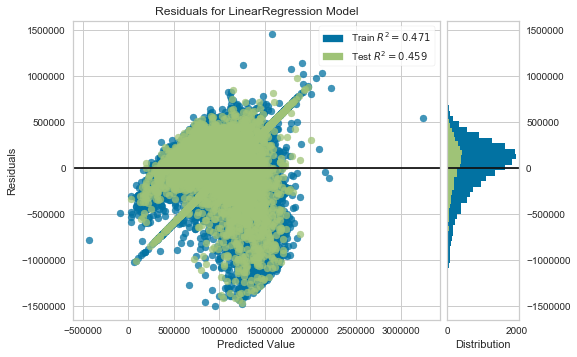

In [82]:
#Plotting the residuals versus fitted 
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

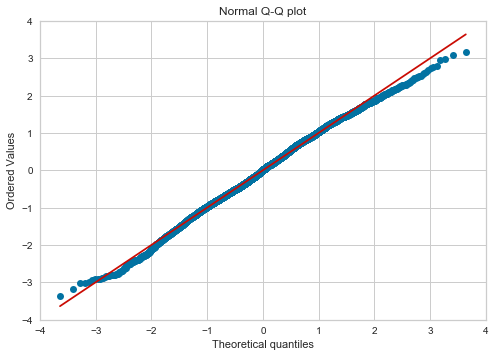

In [83]:
z = (yhat-np.mean(yhat))/np.std(yhat)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Decision Trees

In [84]:
dt = DecisionTreeRegressor(random_state=2,max_depth=9)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2, splitter='best')

In [85]:
predTree = dt.predict(X_test)
predTree

array([1520070.10828947, 1647340.2517514 ,  615167.14654697, ...,
       1070001.90810163, 1647340.2517514 ,  970538.20889926])

In [86]:
print("R-squared score: ",r2_score(y_test, predTree))
print("MAE:", metrics.mean_absolute_error(y_test, predTree))
print('MSE:', metrics.mean_squared_error(y_test, predTree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predTree)))

R-squared score:  0.5339092317620399
MAE: 215127.09731986196
MSE: 88460721424.57304
RMSE: 297423.47154280386


## Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state= 3,max_depth = 9,n_estimators = 10)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=3, verbose=0,
                      warm_start=False)

In [88]:
predforest = rf.predict(X_test)
predforest

array([1518622.22657256, 1570429.04423732,  668919.45091354, ...,
       1112588.28552973, 1484154.29150175,  974844.33210404])

In [89]:
print("R-squared score: ",r2_score(y_test, predforest))
print("MAE:", metrics.mean_absolute_error(y_test, predforest))
print('MSE:', metrics.mean_squared_error(y_test, predforest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predforest)))

R-squared score:  0.5832211135554207
MAE: 203656.41301620816
MSE: 79101676072.23373
RMSE: 281250.2019061208


### Support Vector Machine

In [67]:
from sklearn.svm import SVR

svr = SVR(kernel = 'poly',gamma='scale',C=0.1,degree=3)
svr.fit(X_train,y_train)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
svrpred = svr.predict(X_test)
svrpred

array([1088423.0142165 , 1088634.84426329, 1088633.66481348, ...,
       1088633.453071  , 1088631.04115077, 1088621.37012374])

In [69]:
print("R-squared score: ",r2_score(y_test, svrpred))
print("MAE:", metrics.mean_absolute_error(y_test, svrpred))
print('MSE:', metrics.mean_squared_error(y_test, svrpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svrpred)))

R-squared score:  -0.010932755432990104
MAE: 319604.3395550659
MSE: 194482391324.13663
RMSE: 441001.5774621862


#### Evaluation Scores

| Evaluation Metric | Linear Regression | Decision Tree | Random Forest| Support Vector Machine | 
|------|------|------|------|------|
| R-squared | 0.47| 0.55|0.60|-0.016|
| Mean Absolute Error (MAE) | 238855| 210566|199245|316350.76|
| Mean Squared Error (MSE) | 98745533075 | 84178184650 |74224439600|190780481444|
| Root Mean Squared Error (RMSE) | 314238 |290134|272441|436784|